In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.sparse import hstack
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [104]:
data=pd.read_csv('dataset/train.csv')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [106]:
data.shape

(32165, 8)

In [107]:
data.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score'],
      dtype='object')

In [95]:
data.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


## Null values

In [108]:
data.isna().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

## EDA

### name_of_drug

In [6]:
data.name_of_drug.value_counts()

Levonorgestrel                       724
Etonogestrel                         628
Ethinyl estradiol / norethindrone    547
Ethinyl estradiol / norgestimate     425
Nexplanon                            397
                                    ... 
Ephedrine / guaifenesin                1
Xalkori                                1
Methscopolamine                        1
Brimonidine / timolol                  1
Didrex                                 1
Name: name_of_drug, Length: 2220, dtype: int64

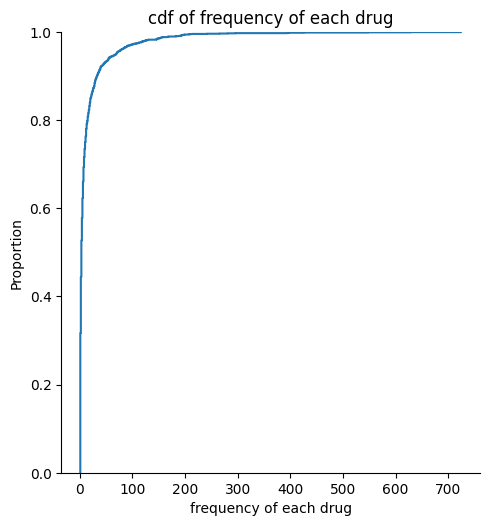

In [7]:
sns.displot(data.name_of_drug.value_counts().values,kind='ecdf')
plt.xlabel('frequency of each drug')
plt.title('cdf of frequency of each drug')
plt.show()

--> total 2220 unique drug names \
--> Levonorgestrel is the most frequent drug (724)\
--> more than 90% of drug names occurs between 1 and 200 times in the dataset

### use_case_for_drug

In [8]:
data.use_case_for_drug.value_counts()

Birth Control                                    5795
Depression                                       1791
Pain                                             1273
Anxiety                                          1174
Acne                                             1101
                                                 ... 
amilial Mediterranean Feve                          1
Pre-Exposure Prophylaxis                            1
Oligospermia                                        1
Mycobacterium avium-intracellulare, Treatment       1
92</span> users found this comment helpful.         1
Name: use_case_for_drug, Length: 636, dtype: int64

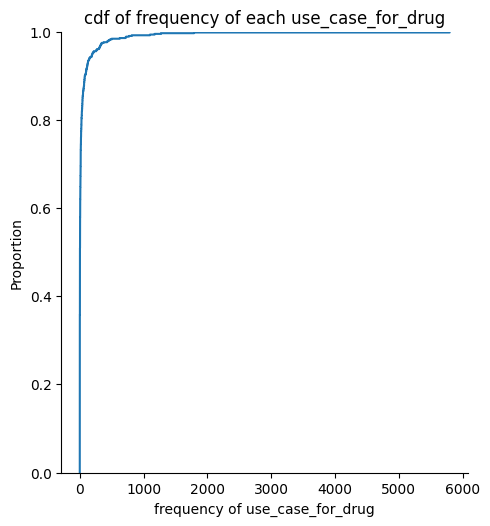

In [27]:
sns.displot(data.use_case_for_drug.value_counts().values,kind='ecdf')
plt.xlabel('frequency of use_case_for_drug')
plt.title('cdf of frequency of each use_case_for_drug')
plt.show()

--> total 636 unique use_case_for_drug \
--> Birth control is most frequent use_case_for_drug \
--> more than 90% of use_case_for_drug occurs between 1 and 2000 times in the dataset \
--> look like some values contain some misinformation like 92 <r/span> users found this comment helpful.

### review_by_patient

In [10]:
data.review_by_patient

0        "It has no side effect, I take it in combinati...
1        "My son is halfway through his fourth week of ...
2        "I used to take another oral contraceptive, wh...
3        "Suboxone has completely turned my life around...
4        "2nd day on 5mg started to work with rock hard...
                               ...                        
32160    "I have been taking Cymbalta for 15 months now...
32161    "I have had the Nexplanon since Dec. 27, 2016 ...
32162    "Had panic attacks and social anxiety starting...
32163    "I have been off Prozac for about 4 weeks now....
32164    "Limited improvement after 4 months, developed...
Name: review_by_patient, Length: 32165, dtype: object

In [29]:
length = data.review_by_patient.apply(lambda x:len(x))

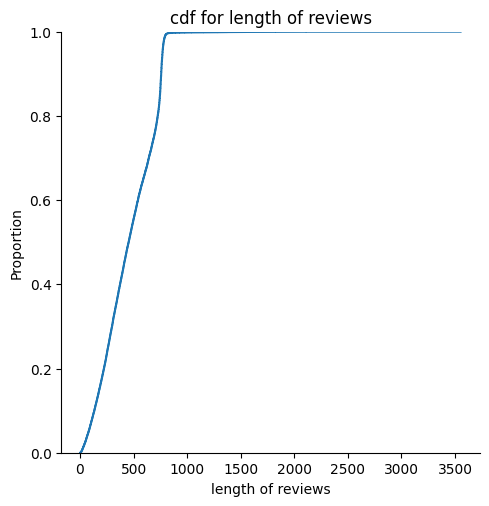

In [31]:
sns.displot(length,kind='ecdf')
plt.xlabel('length of reviews')
plt.title('cdf for length of reviews')
plt.show()

In [35]:
length  =  data.review_by_patient.apply(lambda x:len(x.split(' ')))

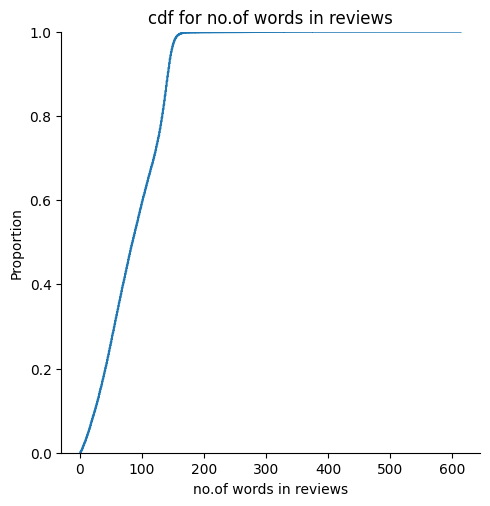

In [37]:
length  =  data.review_by_patient.apply(lambda x:len(x.split(' ')))
sns.displot(length,kind='ecdf')
plt.xlabel('no.of words in reviews')
plt.title('cdf for no.of words in reviews')
plt.show()

--> legth of review are in between 0 to 1000 (>90% of review) \
--> no.of words in each review are in between 0 to 200(>90% of review)

### effectiveness_rating

In [38]:
data.effectiveness_rating.value_counts()

10    10252
9      5429
1      4295
8      3786
7      1832
5      1581
2      1422
6      1289
3      1267
4      1012
Name: effectiveness_rating, dtype: int64

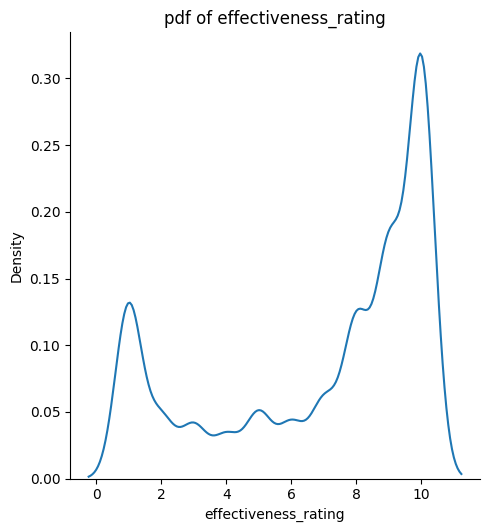

In [42]:
sns.displot(data.effectiveness_rating.values,kind='kde')
plt.xlabel('effectiveness_rating')
plt.title('pdf of effectiveness_rating')
plt.show()

--> it range between 0 to 10

### drug_approved_by_UIC

In [70]:
val=data.drug_approved_by_UIC.apply(lambda x:int(x.strip()[-2:]))

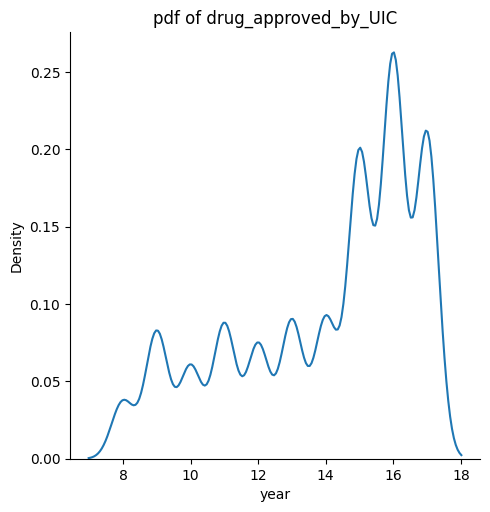

In [74]:
sns.displot(val,kind='kde')
plt.xlabel('year')
plt.title('pdf of drug_approved_by_UIC')
plt.show()

--> year by year drug_approved_by_UIC  are increasing

### number_of_times_prescribed

In [76]:
data.number_of_times_prescribed

0         27
1        192
2         17
3         37
4         43
        ... 
32160     89
32161      0
32162     25
32163     22
32164     35
Name: number_of_times_prescribed, Length: 32165, dtype: int64

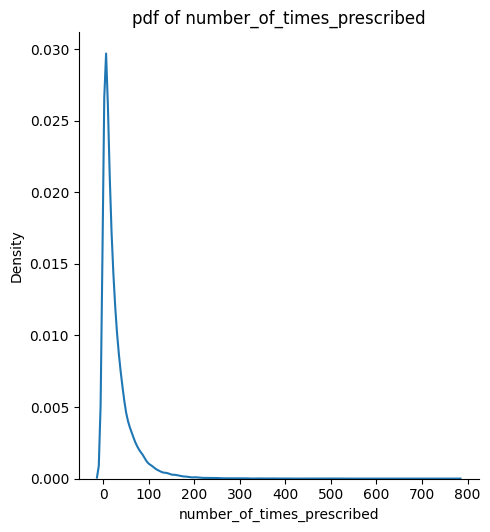

mean : 27.893206901912016


In [88]:
sns.displot(data.number_of_times_prescribed.values,kind='kde')
plt.xlabel('number_of_times_prescribed')
plt.title('pdf of number_of_times_prescribed')
plt.show()
print("mean : {}".format(data.number_of_times_prescribed.values.mean()))

--> number_of_times_prescribed are in between 1 to 200(mostly)

### base_score

In [89]:
data.base_score

0        8.022969
1        7.858458
2        6.341969
3        6.590176
4        6.144782
           ...   
32160    6.963020
32161    0.899076
32162    6.241812
32163    7.940428
32164    8.205393
Name: base_score, Length: 32165, dtype: float64

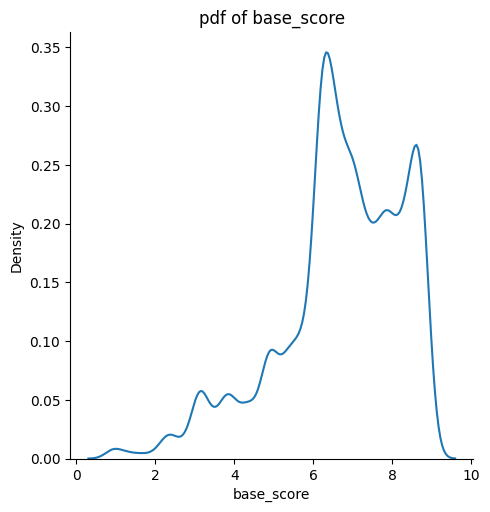

mean : 6.6642614278550125


In [91]:
sns.displot(data.base_score,kind='kde')
plt.title('pdf of base_score')
plt.show()
print("mean : {}".format(data.base_score.values.mean()))

--> basescore is in beween 0 to 10

### correlation 

In [97]:
data.drug_approved_by_UIC=data.drug_approved_by_UIC.apply(lambda x:int(x.strip()[-2:]))

/tmp/ipykernel_783324/4173886733.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


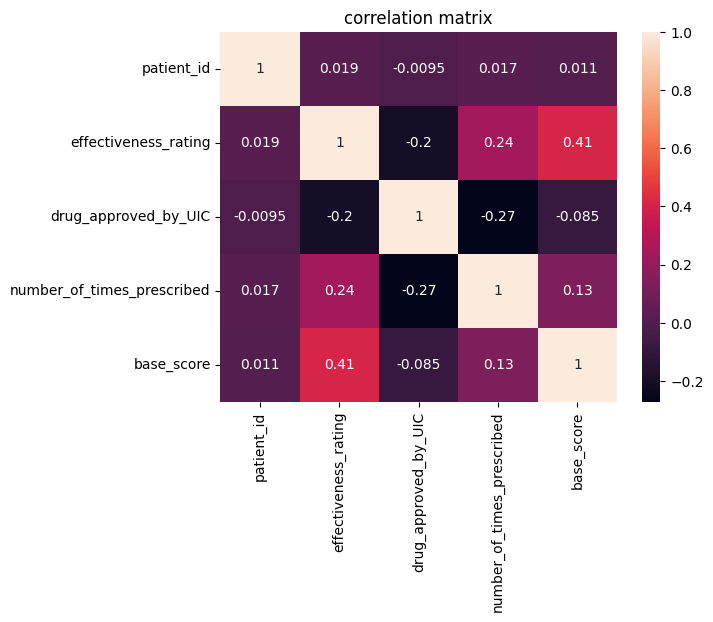

In [102]:
sns.heatmap(data.corr(),annot=True)
plt.title('correlation matrix')
plt.show()

--> base_score and effective_ratings are correlated